In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline
import statistics as stats
import scipy
from scipy.stats import pearsonr

In [2]:
salary_df = pd.read_csv('salary.csv')
#metadata = pd.read_csv('salary metadata.csv')

# 1.Number of respondents

In [3]:
salary_df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


In [4]:
#total number of null values in the data-set.
sal_nan = salary_df.isna().sum().sum()
sal_nan

1

In [5]:
salary_df.loc[:,salary_df.isnull().any()]

,salary
0,53000.0
1,58000.0
2,45500.0
3,35782.0
4,34731.0
...,...
509,45906.0
510,60402.0
511,53187.0
512,56542.0


1.OBSERVATION-

There is 514 Respondents with one of the respondents giving a Null value as they may have not felt comfortable revealing their salary but it wont affect the data too much as we can replace it with zero, drop it or even replace it with the mean.

# 2.highest salary in group

In [6]:
print(salary_df[salary_df.salary == salary_df.salary.max()]) 

      salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
377  96156.0       20           12         12    1.19       1          0   

     position  male  Field  yearsabs  
377         3     1      1         2  


# 2.lowest salary in group

In [7]:
print(salary_df[salary_df.salary == salary_df.salary.min()])

     salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
79  29000.0        6            0          0    0.78       0          0   

    position  male  Field  yearsabs  
79         1     1      3         0  


2.OBSERVATION-

The highest paid and lowest paid is Male, we can make assumptions that Men dominate work spaces more than females.

# 3.mean of the salary column with standard error of the mean.

In [8]:
print("the mean of the salary:",salary_df.loc[:,"salary"].mean())
print("the standard error of the mean:",salary_df.loc[:,"salary"].sem().round())

the mean of the salary: 50863.22009783625
the standard error of the mean: 560.0


3.OBSERVATION-

this shows the ave salary is around +50k

# 4.standard deviation for the years worked

In [9]:
salary_df["yearsworked"].std()

9.444695144169803

# 5. median of the salary column

In [10]:
salary_df.loc[:,"salary"].median()

50096.0

# 6.The interquartile range for salary in the sample


In [11]:
from scipy import stats 
IQR = stats.iqr(salary_df['salary'], interpolation = 'midpoint')
IQR

nan

# 7.Number of males and females in this sample

In [12]:
sex_df = salary_df['male'].value_counts()

In [13]:
sex_df = pd.DataFrame(sex_df)
sex_df.index = ['Male', 'Female']
sex_df = sex_df.rename(columns = {"male":"Count"}) 

In [14]:
sex_df

,Count
Male,386
Female,128


7.OBSERVATION-

Males obviously dominate this dataset

# 8.How many women are executives compared to men?

In [15]:
male_df = salary_df[salary_df.male == 1]
female_df = salary_df[salary_df.male == 0]

In [16]:
print("number of women executives are:",len(female_df[female_df.position == 3]))
print("number of men executives are:",len(male_df[male_df.position == 3]))


number of women executives are: 19
number of men executives are: 192


# 9. histogram for the variable Salary.

<function matplotlib.pyplot.show(*args, **kw)>

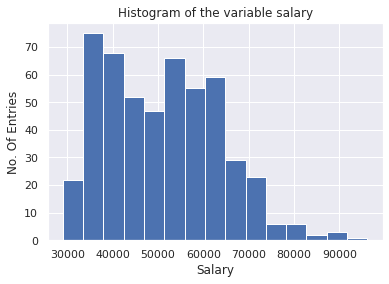

In [26]:
plt.hist(salary_df['salary'], bins=15)
plt.title('Histogram of the variable salary')
plt.xlabel('Salary')
plt.ylabel('No. Of Entries')
plt.show

# 10.Examining the histogram and describing the distribution for Salary.


10.OBSERVATION-

This distribution is positive skewness or right skewed and by observing the mean and median we can confirm this observation as the Mean is higher than the Median. The histogram also shows from around 70 000 to 90 000+ that they could be the Outliers and Between 35 000 to 40 000 you find the mode while our average salary pay is around 50 000 dollars.

# 11. bar graph to show the different average salaries of men and women.

In [24]:
ave_sal = salary_df.groupby(['male']).mean()
ave_sal.rename(index={0:'female', 1:'male'}, inplace=True)
ave_sal = ave_sal.round()
ave_sal

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,Field,yearsabs
male,,,,,,,,,,
female,42917.0,3.0,8.0,4.0,1.0,1.0,0.0,2.0,3.0,25.0
male,53498.0,3.0,14.0,8.0,1.0,1.0,0.0,2.0,2.0,1.0


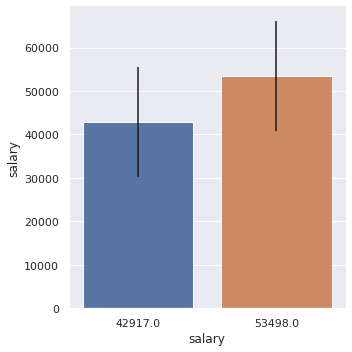

In [25]:
labels=["female","male"]
err = salary_df["salary"].std()
sns.catplot(x="salary",y="salary",data=ave_sal, yerr =err, kind="bar")
plt.show()

11.OBSERVATION-

We can assume they may be a bias in the industry as the average salary for males is +/- 10k more than females

# 12. scatterplot with seaborn showing the relationship between Years Worked and Salary 

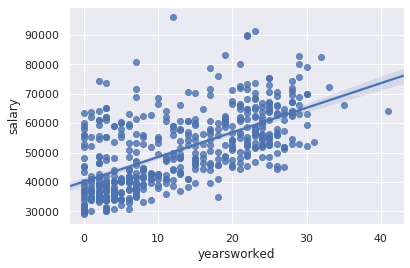

In [20]:
sns.regplot(x = salary_df['yearsworked'], y = salary_df['salary'])

12.OBSERVATION-

The relationship between the years worked and salary is a positive one, as the years increase so does the salary.
The plot also reveals outliers that a respondent can earn above 90 000 dollars yet has worked less than 15 years. While other factors could be attributing to this such as rank, field, degree or the mere fact that it's a male it also doesn't make sense how one of the respondents can have more than 40 years exp yet earns just above the average pay and we can assume that it might be a female or the type of occupation.

In [21]:
salary_df = salary_df.fillna(salary_df.mean())

In [22]:
salary_df.isna().sum().sum()

0

# 13. calculate the Pearson correlation coefficient

In [23]:
pearson = pearsonr(salary_df['yearsworked'], salary_df['salary'])
print(pearson)


(0.6231354820920552, 1.2747795189693407e-56)


### Interpret the size and direction of the correlation statistic.

0.62 shows a moderately positive relationship.

### Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

The relationship is statistically insignificant, suggesting from our plot and p-value that there is no really direct affect to salary by the number of years worked. The higher the p-value the less significant